In [6]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [62]:
#Read in the csv file and convert to a Pandas dataframe
df_football = pd.read_csv('./final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [8]:
df_football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [9]:
df_football.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [10]:
df_football.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [11]:
df_football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [12]:
df_football.describe(include=object)

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# data is trustworthy; check Kaggle for more info

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [13]:
#data is up to date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [14]:
#one data source; no need to check

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
df_football.duplicated().sum() # -> there is no duplicate

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [16]:
#Display number missing values per column
df_football.isnull().sum() # there is no nulls

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [17]:
df_football[(df_football['current_value'] == 0 ) & (df_football['highest_value'] == 0)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
406,/sven-botman/profil/spieler/361093,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,...,0.0,0.0,6560,118,19,4,0,0,2,0
407,/fabian-schar/profil/spieler/135343,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,...,0.0,0.0,5911,285,30,3,0,0,2,0
408,/jamaal-lascelles/profil/spieler/183318,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,...,0.0,0.0,2609,418,57,2,0,0,2,0
409,/matt-targett/profil/spieler/250478,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,...,0.0,0.0,3790,380,66,0,0,0,2,1
666,/mert-komur/profil/spieler/777005,FC Augsburg,Mert Kömür,midfield-AttackingMidfield,183.000000,17.000000,46,0.268876,0.293319,0.073330,...,0.0,0.0,3682,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,/zahi-addis/profil/spieler/1069563,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,2,1
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10686,/corey-hollman/profil/spieler/890186,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,3,0,0,0,0,0,3,0


In [63]:
df_football.drop(df_football[df_football['current_value'] == 0 ].index , inplace=True) #drop where current =0

In [19]:
df_football.shape

(10587, 22)

In [64]:
df_football['position_encoded'].value_counts() 

position_encoded
2    3476
3    3039
4    2869
1    1203
Name: count, dtype: int64

In [65]:
df_football['position'].value_counts()

position
Defender Centre-Back          1803
Attack Centre-Forward         1341
Goalkeeper                    1203
midfield-CentralMidfield      1136
midfield-DefensiveMidfield     886
Defender Right-Back            853
Defender Left-Back             796
midfield-AttackingMidfield     761
Attack-RightWinger             712
Attack-LeftWinger              710
midfield-RightMidfield          99
midfield-LeftMidfield           99
Attack-SecondStriker            65
midfield                        58
Attack                          41
Defender                        24
Name: count, dtype: int64

In [58]:
fig = px.scatter(df_football, x='current_value')
fig.show()

In [70]:
df_football[df_football['current_value'] <= 100000000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
450,/phil-foden/profil/spieler/406635,Manchester City,Phil Foden,Attack-LeftWinger,171.0,23.0,93,0.446612,0.292608,0.077002,...,0.0,0.0,5844,121,23,15,110000000,110000000,4,1
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1.118270,0.234699,0.124252,...,0.0,0.0,6519,204,36,17,170000000,170000000,4,0
474,/bukayo-saka/profil/spieler/433177,Arsenal FC,Bukayo Saka,Attack-RightWinger,178.0,21.0,91,0.342109,0.228073,0.164719,...,0.0,0.0,7103,27,2,2,110000000,110000000,4,1
960,/jude-bellingham/profil/spieler/581678,Borussia Dortmund,Jude Bellingham,midfield-CentralMidfield,186.0,19.0,86,0.244798,0.257038,0.269278,...,0.0,0.0,7353,19,4,2,120000000,120000000,3,0
1017,/jamal-musiala/profil/spieler/580195,Bayern Munich,Jamal Musiala,midfield-AttackingMidfield,184.0,20.0,87,0.431655,0.395683,0.071942,...,0.0,0.0,5004,66,6,11,110000000,110000000,3,0
1516,/federico-valverde/profil/spieler/369081,Real Madrid,Federico Valverde,midfield-CentralMidfield,182.0,24.0,102,0.161113,0.111540,0.136326,...,0.0,0.0,7262,201,37,10,100000000,100000000,3,0
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,Attack-LeftWinger,176.0,22.0,107,0.448356,0.408502,0.229160,...,0.0,0.0,9033,70,12,12,150000000,150000000,4,1
1523,/rodrygo/profil/spieler/412363,Real Madrid,Rodrygo,Attack-RightWinger,174.0,22.0,106,0.400891,0.300668,0.128858,...,0.0,0.0,6286,140,25,8,100000000,100000000,4,1
1540,/pedri/profil/spieler/683840,FC Barcelona,Pedri,midfield-CentralMidfield,174.0,20.0,57,0.244178,0.040696,0.081393,...,0.0,0.0,4423,278,47,3,100000000,100000000,3,0
2023,/victor-osimhen/profil/spieler/401923,SSC Napoli,Victor Osimhen,Attack Centre-Forward,190.0,24.0,71,0.826617,0.185567,0.168697,...,0.0,0.0,5335,0,0,6,100000000,100000000,4,0


In [71]:
df_football = df_football[df_football['current_value'] <= 100000000]

In [72]:
df_football.shape

(10580, 22)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
# check columns types
df_football.dtypes 

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [73]:
df_football['age'] = df_football['age'].astype('int') # change age Dtype

In [74]:
df_football.drop(['player'],axis=1,inplace=True) # -> drop unrelevent column
df_football.drop(['name'],axis=1,inplace=True) # -> drop unrelevent column

In [75]:
fig = px.histogram(
    df_football, 
    x='age', 
    title='Age Distrbution',
    color_discrete_sequence=['lightskyblue']
)

# Show the figure
fig.show()

In [76]:
df_football = df_football[(df_football['age'] <= 35 )] #filter out outliers

In [77]:
df_football.shape

(10259, 20)

In [29]:
fig = px.histogram(
    df_football, 
    x='height', 
    title='Height Distrbution',
    color_discrete_sequence=['lightskyblue']
)

# Show the figure
fig.show()

In [78]:
df_football = df_football[(df_football['height'] >= 165 ) & (df_football['height'] <= 200)]  #filter out outiler

In [31]:
df_football.shape

(10028, 20)

In [32]:
fig = px.histogram(df_football, x='position_encoded',  title='position encoded distrbution',
    color_discrete_sequence=['lightskyblue'], nbins= 10)

fig.show()

In [33]:
fig = px.scatter(df_football, x='appearance', title='Appearancee Distrbution',
    color_discrete_sequence=['lightskyblue'])

fig.show()

In [79]:
df_football = df_football[df_football['appearance'] >= 10] #filter out outliers

In [35]:
df_football.shape

(8025, 20)

In [36]:
fig = px.scatter(df_football, x='minutes played',  color_discrete_sequence=['lightskyblue'])
fig.show()

In [80]:
df_football = df_football[df_football['minutes played'] >= 350 ]

In [81]:
df_football = df_football[df_football['days_injured'] <= 1000 ]

In [39]:
avg_value = df_football.groupby('position')['current_value'].mean().sort_values(ascending=False)
fig = px.bar(x=avg_value.index, y= avg_value.values, title='Average Current Value')
fig.show()

In [82]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger']

#### 2. Feature engineering

In [83]:
# one hot coding
df_football = pd.get_dummies(df_football, columns=categorical_features)

In [84]:
df_football.shape

(8010, 408)

In [85]:
#feature seletion:
correlation = df_football.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.837696
appearance             0.432412
minutes played         0.422985
award                  0.335650
                         ...   
clean sheets          -0.039464
yellow cards          -0.039735
position_Goalkeeper   -0.054947
goals conceded        -0.061891
age                   -0.064206
Name: current_value, Length: 408, dtype: float64


In [86]:
 #Set the correlation threshold
threshold = 0.25  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value'],
      dtype='object')

In [87]:
selected_features = ['appearance', 'minutes played', 'award', 'current_value',
       'highest_value']


In [88]:
df_football = df_football[selected_features]
df_football.head(2)

,appearance,minutes played,award,current_value,highest_value
0,104,9390,13,15000000,70000000
1,15,1304,1,1500000,22000000


In [47]:
df_football.shape

(7877, 5)

#### 4. Prepare train and test data

In [89]:
# Prepare data
X = df_football.drop(['current_value'], axis=1)
y = df_football['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X.shape

(8010, 4)

## Buliding the Model

In [91]:
model = LinearRegression()

In [92]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [93]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [94]:
y_base = [y_train.mean()] * len(y_test)


In [95]:
#  benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:.2e}')

Mean Squared Error of base model: 8.87e+13


In [96]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:.2e}')
print(f'Mean Squared Error for testing: {mse_test:.2e}')

Mean Squared Error for training: 2.47e+13
Mean Squared Error for testing: 2.29e+13


In [98]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 5165610.665740857


In [99]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 2406828.5470029786
Mean Absolute Error for testing: 2426599.9236842846


In [100]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2272.7979817266773


In [101]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 4966270.771961007
Root Mean Squared Error for testing: 4788752.5448274845


In [102]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7297203260683456
R Square for testing: 0.7413948793420599


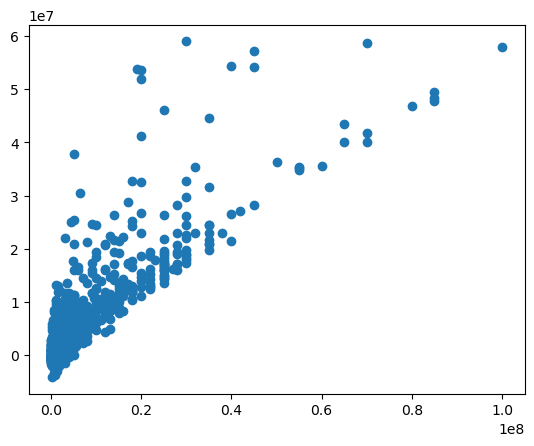

In [103]:
predictions = model.predict(X_test_scaled)
Real_Values = np.array(y_test)
plt.scatter(Real_Values,predictions);

In [97]:
# model accuracy 
accuracy = model.score(X_test, y_test)
print(f'The accuracy of the model is {accuracy}')

The accuracy of the model is -188337854672616.47


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [ ]:
# Scatter plot of actual vs predicted values
